In [1]:
import torch

def Lines(text = "", count = 100):
    print("─"*100)
    if text != "":
        print(f"{text}")
        print("─"*count)

#────────────────────────────────────────
# [1] CPU/GPU할당 
#───────────────────────────────────────
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
# ────────────────────────────────────────
# [2] 데이터셋 다운로드 및 기본정보
# - torch datasets에서
# - 10개의 숫자 분류 32*32*3 칼라 이미지 (학습 약 7.3만장, 테스트 약 2.6만장)
# ───────────────────────────────────────
SVHN_MEAN = [0.4377, 0.4438, 0.4728]
SVHN_STD = [0.1980, 0.2010, 0.1970]
DATA_PATH = './data'

transform = v2.Compose([
    v2.ToImage(),                          # PIL / numpy → Image tensor
    v2.ToDtype(torch.float32, scale=True), # 0~1 범위 실수화
    v2.Normalize(mean=SVHN_MEAN, std=SVHN_STD)
])

# 3. 학습 데이터셋 다운로드 및 로드
Lines("SVHN 학습 데이터셋 다운로드 중...")
train_dataset = datasets.SVHN(
    root=DATA_PATH,        # 데이터가 저장될 경로
    split='train',         # 학습 데이터 지정
    download=True,         # 데이터가 없으면 다운로드
    transform=transform    # 적용할 전처리
)
Lines(f"SVHN 학습 데이터셋 로드 완료. 샘플 수: {len(train_dataset)}")
# 4. 테스트 데이터셋 다운로드 및 로드
Lines("SVHN 테스트 데이터셋 다운로드 중...")
test_dataset = datasets.SVHN(
    root=DATA_PATH,        # 데이터가 저장될 경로
    split='test',          # 테스트 데이터 지정
    download=True,         # 데이터가 없으면 다운로드
    transform=transform    # 적용할 전처리
)
Lines(f"SVHN 테스트 데이터셋 로드 완료. 샘플 수: {len(test_dataset)}")

# 첫번째 샘플 확인
Lines("첫 번째 샘플 확인")
image, label = train_dataset[0]
print("\n첫 번째 샘플 정보:")
print(f"이미지 텐서 크기: {image.shape}")  # 기대 출력: torch.Size([3, 32, 32]) (C, H, W)
print(f"라벨: {label}")

# SVHN 클래스 수동 정의 (0부터 9까지)
# SVHN은 라벨 10이 숫자 0을 나타내는 경우가 있지만, datasets.SVHN은 이를 0으로 변환하여 반환합니다.
# 따라서 0-9의 리스트를 클래스로 정의하는 것이 일반적입니다.
classes = [str(i) for i in range(10)] 

Lines("Class")
print(classes)
Lines()


────────────────────────────────────────────────────────────────────────────────────────────────────
SVHN 학습 데이터셋 다운로드 중...
────────────────────────────────────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────────────────────────────────────
SVHN 학습 데이터셋 로드 완료. 샘플 수: 73257
────────────────────────────────────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────────────────────────────────────
SVHN 테스트 데이터셋 다운로드 중...
────────────────────────────────────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────────────────────────────────────
SVHN 테스트 데이터셋 로드 완료. 샘플 수: 26032
────────────────────────────────────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────────────────


샘플 이미지 10개 표시:

샘플 이미지 10개 표시 (역정규화 적용):


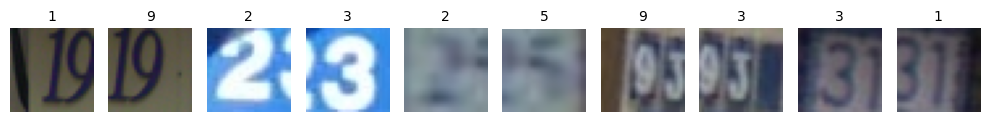

In [9]:
# ────────────────────────────────────────
# [2] 데이터셋 다운로드 및 기본정보
print("\n샘플 이미지 10개 표시:")
# ────────────────────────────────────────
SVHN_MEAN_VIEW = torch.tensor([0.4377, 0.4438, 0.4728]).view(3, 1, 1)
SVHN_STD_VIEW  = torch.tensor([0.1980, 0.2010, 0.1970]).view(3, 1, 1)

print("\n샘플 이미지 10개 표시 (역정규화 적용):")
# 5개의 서브플롯만 생성
fig, axes = plt.subplots(1, 10, figsize=(10, 3))

for i in range(10):
    img, label = train_dataset[i]
    
    # 1. 역정규화 (Denormalization)
    # img = (img * std) + mean
    img = img * SVHN_STD_VIEW + SVHN_MEAN_VIEW 
    
    # 2. 값 클리핑 (Clipping)
    # 역정규화 후에도 작은 부동 소수점 오차로 인해 [0, 1] 범위를 벗어날 수 있어 클리핑
    img = torch.clamp(img, 0, 1) 
    
    # 3. Tensor를 이미지로 변환: (C, H, W) -> (H, W, C)
    img = img.permute(1, 2, 0)
    
    # imshow는 NumPy 배열을 더 선호하므로 to('cpu').numpy() 추가
    axes[i].imshow(img.to('cpu').numpy()) 
    axes[i].set_title(f'{classes[label]}', fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# ────────────────────────────────────────
# [2] 데이터셋 다운로드 및 기본정보
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True,num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=2
)

Lines(f"train_loader Len: {len(train_loader)}")
Lines(f"Train_loader Batch Size: {train_loader.batch_size}")

first_batch_data, first_batch_labels = next(iter(train_loader))
Lines(f"첫 배치 shape: {first_batch_data.shape}")  # [32, 3, 32, 32]
Lines(f"레이블 shape: {first_batch_labels.shape}")  # [32]

────────────────────────────────────────────────────────────────────────────────────────────────────
train_loader Len: 2290
────────────────────────────────────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────────────────────────────────────
Train_loader Batch Size: 32
────────────────────────────────────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────────────────────────────────────
첫 배치 shape: torch.Size([32, 3, 32, 32])
────────────────────────────────────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────────────────────────────────────
레이블 shape: torch.Size([32])
────────────────────────────────────────────────────────────────────────────────────────────────────
